In [1]:
from google.colab import drive

drive.mount('/content/drive', force_remount=True)

# enter the foldername in your Drive where you have saved the unzipped
# 'cs231n' folder containing the '.py', 'classifiers' and 'datasets'
# folders.
# e.g. 'cs231n/assignments/assignment1/cs231n/'
FOLDERNAME ='cs231n_project/'

assert FOLDERNAME is not None, "[!] Enter the foldername."

%cd drive/My\ Drive
%cd $FOLDERNAME

Mounted at /content/drive
/content/drive/My Drive
/content/drive/My Drive/cs231n_project


In [0]:
#import sys
#!{sys.executable} -m pip install torchsummary


from torch.utils.data import Dataset,DataLoader
from torchvision import transforms
import os
import numpy as np
import time
from PIL import Image
#from PIL import ImageFile
#ImageFile.LOAD_TRUNCATED_IMAGES = True
from collections import defaultdict
import cv2
import pdb
IMG_SIZE = (256,256)

from torchvision import models
from torchsummary import summary




In [0]:
#dataset_train.__len__
#dataset_test.shape
#dataset_val.shape

#'''test corrupted images'''
#data_path = "/home/mandeep_stanford/cs231n_project/code/pre-processed_data/images_denoised/session1/"
#dataset_train, dataset_test, dataset_val = get_imagenet_datasets(data_path, "cpc")
#
#print(f"Number of train samplest {dataset_train.__len__()}")
#print(f"Number of samples in test split {dataset_test.__len__()}")
#
#BATCH_SIZE = 200
#
#data_loader_train = DataLoader(dataset_train, BATCH_SIZE, shuffle = True)
#data_loader_test = DataLoader(dataset_test, BATCH_SIZE, shuffle = True)
#
#
#import matplotlib.pyplot as plt
#
#fig, axes = plt.subplots(BATCH_SIZE//20,20, figsize=(6,10))
#
#for batch in data_loader_train:
#
#    print(f"Shape of batch['image'] {batch['image'].shape}")
#    print(f"Shape of batch['cls'] {batch['cls'].shape}")
#
#    for i in range(BATCH_SIZE):
#
#        col = i % 20
#        row = i // 20
#
#        img = batch['image'][i].numpy()
#
#        axes[row,col].set_axis_off()
#        #axes[row,col].set_title(batch['class_name'][i])
#        axes[row,col].imshow(np.transpose(img,(1,2,0)))
#
#    plt.show()
#
#    break


In [0]:

# data_path = "/home/mandeep_stanford/cs231n_project/code/pre-processed_data/images/session1/"
# data_path = "/home/mandeep_stanford/cs231n_project/code/pre-processed_data/combined_session1_2/"
# img_files = os.listdir("/home/mandeep_stanford/cs231n_project/code/pre-processed_data/images/session1/")
# img_files = os.listdir("/home/mandeep_stanford/cs231n_project/code/pre-processed_data/combined_session1_2/")
# pkl_file = "/home/mandeep_stanford/cs231n_project/code/pre-processed_data/images_denoised/session1_pkl_tensor1_with_noise_1_2_new.pkl"

In [0]:
#pkl_file="session1_pkl_tensor1_with_noise_1_2_new.pkl"
pkl_file="without_noise_cleanup_denoised_WHOLE.pkl"
#pkl_file="without_noise_cleanup_denoised.pkl"


In [0]:
import pickle
X = []
Y = []
i = 0

if 0:
    for file_name in os.listdir(data_path):
        print("Working on ", i)
        i = i+1
        if i >= 3000:
            break
        cat = file_name.split('_')[0]
        Y.append(cat)
        img = Image.open(data_path+file_name)
        img = img.convert('RGB')
        tr = transforms.Resize((200,300))
        img=tr(img)
        tr = transforms.ToTensor()
        img1 = tr(img)
        img1 = np.array(img1)
        #X=np.vstack((X,img1))
        X.append(img1)
    
        del img1
        del img
        del tr

    Y = np.asarray(Y)
    X = np.asarray(X)
    data = {}
    data["X"] = X
    data["Y"] = Y
    with open(pkl_file, 'wb') as f:
        pickle.dump(data, f)
        f.close()

    
    
    
    
    




In [0]:
import pickle
import torch
#assert '.'.join(torch.__version__.split('.')[:2]) == '1.4'
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torch.utils.data import sampler
import torch.utils.data as data_utils
import torchvision.datasets as dset
import torchvision.transforms as T
import torch.nn.functional as F 
import numpy as np
#pkl_file = "/home/mandeep_stanford/cs231n_project/code/pre-processed_data/images_denoised/session1_pkl_tensor1.pkl"
data = pickle.load(open(pkl_file, 'rb'))
X = data["X"]
Y = data["Y"]
# X=np.asarray(X)
# Y=np.asarray(Y)



In [0]:
X.shape

In [0]:
np.unique(Y)

In [0]:

import numpy as np
total_images = X.shape[0]
test_data_images = np.int(total_images*0.2)
train_data_images = total_images - test_data_images
#X_train = X[0:train_data_images,-1]
#y_train = Y[0:train_data_images]
#X_test = X[train_data_images:train_data_images+test_data_images, -1]
#y_test= Y[train_data_images:train_data_images+test_data_images]

#X_train = np.asarray(X_train)
#X_test = np.asarray(X_test)
#y_train = np.asarray(y_train)
#y_test = np.asarray(y_test)

#y_train = y_train.reshape((y_train[0]))
#y_test = y_test.reshape((y_test[0]))
#print(X_train.shape)
#print(y_train.shape)
#print(X_test.shape)
#print(y_test.shape)

In [8]:



USE_GPU = True

dtype = torch.float32 # we will be using float throughout this tutorial

if USE_GPU and torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

# Constant to control how frequently we print train loss
print_every = 100

print('using device:', device)

using device: cuda


In [0]:
np.unique(Y)

In [0]:
keys_array

In [44]:
import random
train_data = []
total_images=550
keys_array = np.unique(Y)
num_class={0: 263, 1: 406, 2: 354, 3: 507}

train_data_dict={0:[],1:[],2:[],3:[]}
for i in range(len(X)):
   ind = np.where(keys_array==Y[i]) 
   train_data_dict[Y[i]].append([X[i], Y[i]])
train_data_dict[0]=train_data_dict[0]+train_data_dict[0]
len(train_data_dict[0])

526

In [0]:
train_data_full={}
for key in train_data_dict.keys():
  train_data_full[key]=train_data_dict[key]+random.sample(train_data_dict[key],total_images-len(train_data_dict[key]))

In [46]:
# import random
# train_data = []
# keys_array = np.unique(Y)
# for i in range(len(X)):
#    ind = np.where(keys_array==Y[i]) 
#    train_data.append([X[i], Y[i]])

train_data=train_data_full[0]+train_data_full[1]+train_data_full[2]+train_data_full[3]

    
random.shuffle(train_data)
import numpy as np
total_images = len(train_data)
test_data_images = np.int(total_images*0.2)
train_data_images = total_images - test_data_images
# t,(a1,a2)=list(enumerate(train_data))[0]
# print(t)
# print(a2)
# for t,(a1,a2) in enumerate(train_data):
#   if t==0:
#     print(a2)
print("DONE")
#train_data=np.asarray(train_data)
#dataset = data_utils.TensorDataset(train_data, batch_size=100)
train_data_split=train_data[:train_data_images]
test_data_split=train_data[train_data_images:]
print(train_data_images)
print(train_data_images+test_data_images)
loader_train = DataLoader(train_data_split, batch_size=64, 
                          shuffle=True)

loader_val = DataLoader(test_data_split, batch_size=64, 
                        shuffle=True)


#for t, (x,y) in enumerate(loader_train):
#  print(t, x, y)

DONE
1760
2200


# Frequency of test/train accuracy printed

In [0]:
print_every = 1

# Plot Functions for train/test accuracy, and train loss

In [0]:
#DATA_PATH_PIC=
import matplotlib.pyplot as plt
import copy
def plot_train_test_acc(train_acc_ls,test_acc_ls,best_train,best_test,train_acc_epoch,test_acc_epoch):
  #plt.figure(figsize=(16,10))
  plt.plot(train_acc_ls)
  plt.plot(test_acc_ls)
  plt.plot([best_train]*len(train_acc_ls))
  plt.plot([best_test]*len(test_acc_ls))
  plt.title('model accuracy (iteration)')
  plt.ylabel('accuracy')
  plt.xlabel("iteration")
  plt.legend(['train', 'test',"best_train","best_test"], loc='upper left')
  plt.show()
  plt.plot(train_acc_epoch)
  plt.plot(test_acc_epoch)
  plt.plot([best_train]*len(train_acc_epoch))
  plt.plot([best_test]*len(test_acc_epoch))
  plt.title('model accuracy (epoch)')
  plt.ylabel('accuracy')
  plt.xlabel("epoch")
  plt.legend(['train', 'test',"best_train","best_test"], loc='upper left')
  #plt.savefig(DATA_PATH_PIC+'model_acc.png')
  #.plot(train_acc)
  plt.show()
def plot_loss(loss_ls,loss_ls_test,loss_epoch,loss_epoch_test):
  plt.plot(loss_ls)
  plt.plot(loss_ls_test)
  plt.title('model train loss (iteration)')
  plt.ylabel('train loss')
  plt.xlabel("iteration")
  plt.legend(['loss_train','loss_test'], loc='upper left')
  plt.show()
  plt.plot(loss_epoch)
  plt.plot(loss_epoch_test)
  plt.title('model train loss (epoch)')
  plt.ylabel('train loss')
  plt.xlabel("epoch")
  plt.legend(['loss_train','loss_test'], loc='upper left')
  plt.show()
  #plt.savefig(DATA_PATH_PIC+'model_train_loss.png')



In [0]:
@torch.no_grad()
def get_all_preds(model, loader):
    all_preds = torch.tensor([]).to(device=device)
    model = model.to(device=device)
    for batch in loader:
        images, labels = batch
        images = images.to(device=device, dtype=dtype)  # move to device, e.g. GPU
        labels = labels.to(device=device, dtype=torch.long)
        preds = model(images).to(device=device)
        all_preds = torch.cat(
            (all_preds, preds)
            ,dim=0
        )
    return all_preds

In [0]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
import numpy as np
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

# Functions for Model Train and Accuracy Calculation

In [0]:
def get_confusion_matrix(best_model,loader_train,loader_val):
    best_model.eval()
    train_preds = get_all_preds(best_model, loader_train)
    test_preds = get_all_preds(best_model, loader_val)
    _, train_preds = train_preds.max(1)
    _, test_preds = test_preds.max(1)

    tensor_list_train =[]
    tensor_list_test=[]
    for t, (x,y) in enumerate(loader_train):
       tensor_list_train.append(y)
    for t, (x,y) in enumerate(loader_val):
       tensor_list_test.append(y)
    train_set_targets = torch.cat(tensor_list_train, dim=0).cpu()
    test_set_targets = torch.cat(tensor_list_test, dim=0).cpu()

    cm_train = confusion_matrix(train_set_targets, train_preds.cpu())
    cm_test = confusion_matrix(test_set_targets, test_preds.cpu())
    emotion_dict = ('hap',
                'sad',
                'ang',
                'neu'
                )
    plot_confusion_matrix(cm_train, emotion_dict)
    plot_confusion_matrix(cm_test, emotion_dict)

In [0]:
def check_accuracy_part34(loader, model):
    # if loader.dataset.train:
    #    print('Checking accuracy on validation set')
    # else:
    #    print('Checking accuracy on test set')
    # print('Checking accuracy on test or val set')
    num_correct = 0
    num_samples = 0
    loss=0
    model.eval()  # set model to evaluation mode
    with torch.no_grad():
        for x, y in loader:
            x = x.to(device=device, dtype=dtype)  # move to device, e.g. GPU
            y = y.to(device=device, dtype=torch.long)
            #pdb.set_trace()
            #y = torch.stack(y)#.to(device=device)
            #y=torch.FloatTensor(y)
            #y = y.reshape((x.shape[0]))
            scores = model(x)
            loss += F.cross_entropy(scores, y)
            _, preds = scores.max(1)
            
            num_correct += (preds == y).sum()
            num_samples += preds.size(0)
        acc = float(num_correct) / num_samples
        loss=loss/num_samples
        # print('Test Accuracy Got %d / %d correct (%.2f)' % (num_correct, num_samples, 100 * acc))
        return acc*100,num_correct,num_samples,loss

In [0]:
def train_part34(model, optimizer, epochs=1):
    """
    Train a model on CIFAR-10 using the PyTorch Module API.
    
    Inputs:
    - model: A PyTorch Module giving the model to train.
    - optimizer: An Optimizer object we will use to train the model
    - epochs: (Optional) A Python integer giving the number of epochs to train for
    
    Returns: Nothing, but prints model accuracies during training.
    """
    best_model = copy.deepcopy(model)
    model = model.to(device=device)  # move the model parameters to CPU/GPU
    train_acc_ls=[]
    test_acc_ls=[]
    train_acc_epoch=[]
    test_acc_epoch=[]
    loss_ls=[]
    loss_ls_test=[]
    loss_epoch=[]
    loss_epoch_test=[]
    best_test_acc=0
    best_train_acc=0
    for e in range(epochs):
        for t, (x, y) in enumerate(loader_train):
            #import pdb
            #pdb.set_trace()
            model.train()  # put model to training mode
            x = x.to(device=device, dtype=dtype)  # move to device, e.g. GPU
            y = y.to(device=device, dtype=torch.long)

            #print(t)
            #print(f"pre y: {y}")
            #y = torch.stack(y)#.to(device=device)
            #print(f"aft y: {y}")
            #y=torch.FloatTensor(y)
            #y = y.reshape((x.shape[0]))
            scores = model(x)           
            loss = F.cross_entropy(scores, y)
            

            # Zero out all of the gradients for the variables which the optimizer
            # will update.
            optimizer.zero_grad()

            # This is the backwards pass: compute the gradient of the loss with
            # respect to each  parameter of the model.
            loss.backward()

            # Actually update the parameters of the model using the gradients
            # computed by the backwards pass.
            optimizer.step()
            #pdb.set_trace()
            #print("IN ITERATION", t)
            if t % print_every == 0:
                print('Iteration %d, loss = %.4f' % (t, loss.item()))
                # print("train acc")
                # check_accuracy_part34(batch_train, model)
                _, preds = scores.max(1)
                num_correct = 0
                num_samples = 0
                num_correct += (preds == y).sum()
                num_samples += preds.size(0)
                train_acc = float(num_correct) / num_samples
                train_acc_ls.append(train_acc*100)
                if train_acc*100>best_train_acc:
                  best_train_acc=train_acc*100
                print('Train Accuracy Got %d / %d correct (%.2f)' % (num_correct, num_samples, 100 * train_acc))
                test_acc,num_correct_test,num_samples_test,loss_test=check_accuracy_part34(loader_val, model)
                print('Test Accuracy Got %d / %d correct (%.2f)' % (num_correct_test, num_samples_test, test_acc))
                test_acc_ls.append(test_acc)
                if test_acc>best_test_acc:
                  best_test_acc=test_acc
                  best_model = copy.deepcopy(model)
                loss_ls.append(loss)
                loss_ls_test.append(loss_test*preds.size(0))
        train_acc_ea,_,_,_=check_accuracy_part34(loader_train, model)
        train_acc_epoch.append(train_acc_ea)
        test_acc_ea,_,_,loss_test= check_accuracy_part34(loader_val, model)
        test_acc_epoch.append(test_acc_ea)
        loss_epoch.append(loss) 
        loss_epoch_test.append(loss_test*preds.size(0))         
                
                
    plot_train_test_acc(train_acc_ls,test_acc_ls,best_train_acc,best_test_acc,train_acc_epoch,test_acc_epoch)
    plot_loss(loss_ls,loss_ls_test,loss_epoch,loss_epoch_test)
    print(f"Best Train Accuracy is {best_train_acc}")
    print(f"Best Test Accuracy is {best_test_acc}")

    get_confusion_matrix(best_model,loader_train,loader_val)
    return best_model,best_test_acc

# Model

In [0]:
class Flatten(nn.Module):
    def flatten(x):
        N = x.shape[0] # read in N, C, H, W
        return x.view(N, -1)  # "flatten" the C * H * W values into a single vector per image

    def forward(self, x):
        N = x.shape[0]
        return x.view(N, -1)
class LSTM(nn.Module):

    def __init__(self):
        super().__init__()
        self.model = nn.LSTM(input_size=(32*25*37),hidden_size=128,num_layers=2,batch_first=True,bidirectional =True,dropout=0.3)
        #self.model = nn.RNN(input_size=(32*25*37),hidden_size=128,num_layers=2,batch_first=True,bidirectional =True)
    def forward(self, x):

        # From [batches, seqs, seq len, features]
        # to [seq len, batch data, features]
        x = x.unsqueeze(1)
       
        # Data is fed to the LSTM
        out, _ = self.model(x)

        # From [seq len, batch, num_directions * hidden_size]
        # to [batches, seqs, seq_len,prediction]
        out = out.squeeze(1)


        return out
# class LSTM1(nn.Module):

#     def __init__(self):
#         super().__init__()
#         self.model = nn.LSTM(input_size=(256),hidden_size=128,num_layers=1,batch_first=True,bidirectional =True)
#         #self.model = nn.RNN(input_size=(256),hidden_size=128,num_layers=2,batch_first=True,bidirectional =True)
#     def forward(self, x):

#         # From [batches, seqs, seq len, features]
#         # to [seq len, batch data, features]
#         x = x.unsqueeze(1)
       
#         # Data is fed to the LSTM
#         out, _ = self.model(x)

#         # From [seq len, batch, num_directions * hidden_size]
#         # to [batches, seqs, seq_len,prediction]
#         out = out.squeeze(1)


#         return out
#hidden_layer_size = 500
#learning_rate = 1e-2




l1 = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=(12,16), padding=(6,8), stride=1),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            #nn.Conv2d(channel_1, channel_1, kernel_size=5, padding=2, stride=1),
            nn.MaxPool2d(2, 2)
)


l2 = nn.Sequential(
            nn.Conv2d(16, 24, kernel_size=(8,12), padding=(4,6), stride=1),
            nn.BatchNorm2d(24),
            nn.ReLU(),
            nn.MaxPool2d(2, 2)
)

l3 = nn.Sequential(
            nn.Conv2d(24, 32, kernel_size=(5,7), padding=(2,3), stride=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            Flatten(),
            nn.BatchNorm1d(32*25*37),
            LSTM())      
            # input & output will has batch size as 1s dimension. e.g. (batch, time_step, input_size)
            #nn.LSTM(input_size=(32*25*37), 128, 2, batch_first=True))

            


#l4 = nn.Sequential(
#            nn.Conv2d(channel_3, channel_4, kernel_size=3, padding=1, stride=1),
#            nn.MaxPool2d(2, 1)
#)
hidden_layer_size = keys_array.shape[0]
learning_rate = 1e-4
model1 = nn.Sequential(
            l1,
            l2,
            l3,
            nn.BatchNorm1d(256),
            #nn.ReLU(),
            nn.Linear(256, 64),
            nn.ReLU(),
            nn.Dropout(p=0.5),
            nn.Linear(64, keys_array.shape[0])
)
'''the last three layers for 5-layers conv'''
l32= nn.Sequential(
            nn.Conv2d(24, 32, kernel_size=(5,7), padding=(2,3), stride=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2))

l4 = nn.Sequential(
            nn.Conv2d(32, 40, kernel_size=(2,3), padding=(2,2), stride=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2))
l5=nn.Sequential(
            nn.Conv2d(40, 48, kernel_size=(1,1), padding=(1,1), stride=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2))

model2 = nn.Sequential(
            l1,
            l2,
            l32,
            l4,
            l5,
            Flatten(),
            nn.Linear(3840, 64),
            nn.ReLU(),
            nn.Dropout(p=0.2),
            nn.Linear(64, keys_array.shape[0])
)


Iteration 0, loss = 1.4098
Train Accuracy Got 14 / 64 correct (21.88)
Test Accuracy Got 111 / 440 correct (25.23)
Iteration 1, loss = 1.4257
Train Accuracy Got 16 / 64 correct (25.00)
Test Accuracy Got 111 / 440 correct (25.23)
Iteration 2, loss = 1.4233
Train Accuracy Got 15 / 64 correct (23.44)
Test Accuracy Got 111 / 440 correct (25.23)
Iteration 3, loss = 1.3619
Train Accuracy Got 21 / 64 correct (32.81)
Test Accuracy Got 111 / 440 correct (25.23)
Iteration 4, loss = 1.3162
Train Accuracy Got 23 / 64 correct (35.94)
Test Accuracy Got 111 / 440 correct (25.23)
Iteration 5, loss = 1.3565
Train Accuracy Got 22 / 64 correct (34.38)
Test Accuracy Got 111 / 440 correct (25.23)
Iteration 6, loss = 1.3869
Train Accuracy Got 20 / 64 correct (31.25)
Test Accuracy Got 111 / 440 correct (25.23)
Iteration 7, loss = 1.2686
Train Accuracy Got 20 / 64 correct (31.25)
Test Accuracy Got 111 / 440 correct (25.23)
Iteration 8, loss = 1.3518
Train Accuracy Got 21 / 64 correct (32.81)
Test Accuracy Got 

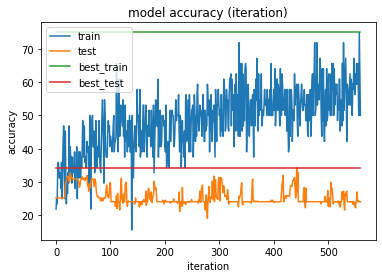

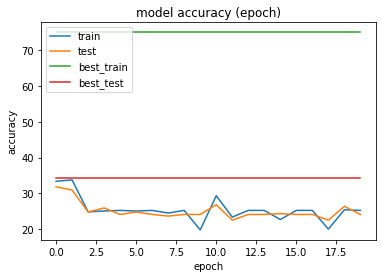

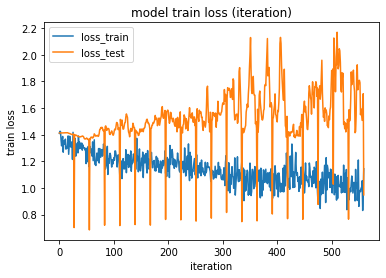

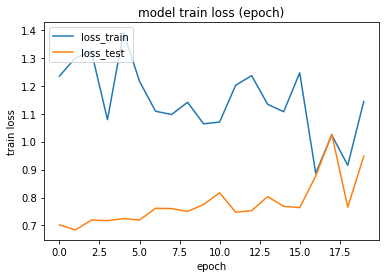

Best Train Accuracy is 75.0
Best Test Accuracy is 34.31818181818182
Confusion matrix, without normalization
[[  0   1 126 309]
 [  0   0 159 282]
 [  0   1 153 290]
 [  0   0 131 308]]


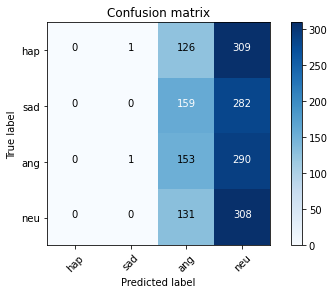

Confusion matrix, without normalization
[[ 0  0 38 76]
 [ 0  0 29 80]
 [ 0  0 35 71]
 [ 0  0 34 77]]


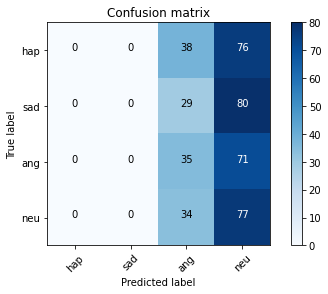

In [88]:
# you can use Nesterov momentum in optim.SGD
#optimizer = optim.Adam(model.parameters(), lr=learning_rate,momentum=0.9, nesterov=True)
optimizer = optim.Adam(model1.parameters(), lr=learning_rate, 
                     betas=(0.9, 0.999), eps=1e-08, weight_decay=0, amsgrad=False)

best_model,best_test_acc=train_part34(model1, optimizer, 20)

# Save the best model to torch

In [0]:
torch.save(best_model, "model1")

# Plot Confusion Matrix

In [0]:
def get_num_correct(preds, labels):
    preds = preds.to(device=device)
    labels = labels.to(device=device)
    num_correct = 0
    num_samples = 0
    num_correct += (preds == labels).sum()
    num_samples += preds.size(0)
    return num_correct.item(), num_samples

In [0]:
with torch.no_grad():
    model2 = torch.load("model1")
    model2.eval()
    train_preds = get_all_preds(model2, loader_train)
    test_preds = get_all_preds(model2, loader_test)

In [0]:
with torch.no_grad():
    model2 = torch.load("model1")
    model2.eval()
    train_preds = get_all_preds(model2, loader_train)
    test_preds = get_all_preds(model2, loader_test)
_, preds = train_preds.max(1)

tensor_list =[]
for t, (x,y) in enumerate(loader_train):
  tensor_list.append(y)
train_set_targets = torch.cat(tensor_list, dim=0)
preds_correct, num_samples = get_num_correct(preds, train_set_targets)

In [0]:
t_t = train_set_targets.cpu()
predict = preds.cpu()
cm = confusion_matrix(t_t, predict)

In [0]:
cm = confusion_matrix(t_t, predict)
emotion_dict = ('hap',
                'sad',
                'ang',
                'neu'
                )
plt.figure(figsize=(6,6))
plot_confusion_matrix(cm, emotion_dict)

# Used Functions

In [0]:
cmt = torch.zeros(keys_array.shape[0],keys_array.shape[0], dtype=torch.int64) '''used??'''

In [0]:
for p in stacked:
    tl, pl = p.tolist()
    cmt[tl, pl] = cmt[tl, pl] + 1   '''used??'''

In [0]:
stacked = torch.stack(
    (
        train_set_targets.to(device=device)
        ,preds.to(device=device)
    ),dim=1)'''used??'''